In [2]:
from preprocess import preprocess,view_head
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('full_preprocessedML.csv.gz',index_col=0)

KeyboardInterrupt: 

In [243]:
df

,img_card_arr,card_class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,...,pixel_186617,pixel_186618,pixel_186619,pixel_186620,pixel_186621,pixel_186622,pixel_186623,suit,is_red,suit_num
0,"[11, 13, 13, 11, 13, 14, 13, 15, 15, 11, 13, 1...",King of Clubs,11,13,13,11,13,14,13,15,...,5,6,6,6,6,6,6,Clubs,0,1
1,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 15, 1...",Jack of Spades,14,14,14,14,14,14,14,14,...,24,23,22,24,24,23,25,Spades,0,3
2,"[20, 26, 33, 20, 25, 34, 20, 25, 34, 17, 22, 3...",3 of Clubs,20,26,33,20,25,34,20,25,...,10,8,8,8,8,8,8,Clubs,0,1
3,"[19, 19, 25, 19, 19, 25, 22, 22, 28, 21, 21, 2...",8 of Spades,19,19,25,19,19,25,22,22,...,3,2,1,3,1,0,2,Spades,0,3
4,"[17, 15, 21, 16, 15, 19, 13, 16, 21, 13, 12, 1...",6 of Diamonds,17,15,21,16,15,19,13,16,...,4,4,4,4,4,4,4,Diamonds,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"[11, 10, 12, 13, 12, 14, 12, 11, 13, 12, 11, 1...",2 of Diamonds,11,10,12,13,12,14,12,11,...,12,12,11,13,10,9,11,Diamonds,1,0
245,"[12, 12, 12, 10, 13, 14, 9, 13, 14, 9, 13, 14,...",5 of Hearts,12,12,12,10,13,14,9,13,...,12,11,11,12,11,10,12,Hearts,1,2
246,"[14, 19, 18, 14, 19, 18, 16, 21, 20, 14, 19, 1...",8 of Hearts,14,19,18,14,19,18,16,21,...,8,9,9,9,9,9,9,Hearts,1,2
247,"[24, 24, 24, 23, 23, 23, 21, 21, 21, 20, 20, 2...",King of Spades,24,24,24,23,23,23,21,21,...,3,2,1,3,3,2,4,Spades,0,3


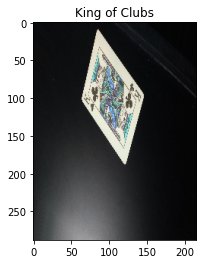

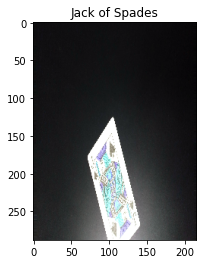

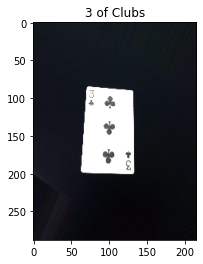

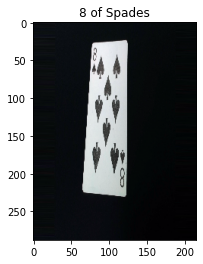

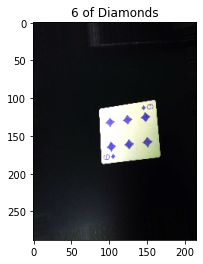

In [244]:
view_head(df,x_dim,y_dim)

In [6]:
#BEFORE MODELLING< VIEW DISTRIBUTIONS AND CHECK COLINEAriTY 



# X['suit'].str.contains('Clubs')

In [251]:
X = df.iloc[:,2:-3]

In [252]:
X.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_186614,pixel_186615,pixel_186616,pixel_186617,pixel_186618,pixel_186619,pixel_186620,pixel_186621,pixel_186622,pixel_186623
0,11,13,13,11,13,14,13,15,15,11,...,6,5,5,5,6,6,6,6,6,6
1,14,14,14,14,14,14,14,14,14,16,...,28,23,22,24,23,22,24,24,23,25
2,20,26,33,20,25,34,20,25,34,17,...,5,10,10,10,8,8,8,8,8,8
3,19,19,25,19,19,25,22,22,28,21,...,3,2,1,3,2,1,3,1,0,2
4,17,15,21,16,15,19,13,16,21,13,...,7,4,4,4,4,4,4,4,4,4


# RANDOM FOREST FOR MULTICLASSCLASSIFICATION

In [255]:
from sklearn.model_selection import train_test_split
y = df['suit_num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,stratify=y)
X_train/=255
X_test/=255 # ONLY AFTER SPLIT k,SCALE

In [259]:
from sklearn.model_selection import GridSearchCV 
param_grid = { 
    'n_estimators': [100, 200,300,400,500],
    'max_depth' : [4,5,6,7]}

forestCV = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
forestCV.fit(X_train, y_train)

forestCV.best_params_,forestCV.best_score_

({'max_depth': 6, 'n_estimators': 100}, 0.6582051282051282)

In [254]:
performance_test_avg_of_estimators = []
performance_test_random_forest= []
for i in range (1,500):
    my_random_forest = RandomForestClassifier(n_estimators=i)
    my_random_forest.fit(X_train, y_train)
 
    for sub_tree in my_random_forest.estimators_:
        decision_tree_scores.append(sub_tree.score(X_test, y_test))

 
    for sub_tree in my_random_forest.estimators_:
        decision_tree_scores.append(sub_tree.score(X_test, y_test))
    performance_test_avg_of_estimators.append(np.mean(decision_tree_scores))
    performance_test_random_forest.append(my_random_forest.score(X_test,y_test))


KeyboardInterrupt: 

In [ ]:
plt.plot(performance_test_avg_of_estimators,label = 'AVG')
plt.plot(performance_test_random_forest,label = 'Random_Forest')
plt.legend()


In [198]:
s = pd.Series(index=np.arange(0,499), data= performance_test_random_forest)
s

0      0.48
1      0.48
2      0.48
3      0.56
4      0.42
       ... 
494    0.46
495    0.46
496    0.46
497    0.46
498    0.46
Length: 499, dtype: float64

In [207]:
s.idxmax()

104

In [238]:
my_random_forest = RandomForestClassifier(n_estimators=s.idxmax())
my_random_forest.fit(X_train_PCA,y_train)
y_pred = my_random_forest.predict(X_test_PCA)
(y_pred == y_test).sum()/len(y_test)

0.46